In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from matplotlib import pyplot as plt

# Logistic Regression with DataLoader

In [2]:
class LRData(data.Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [3]:
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.l = nn.Linear(1,1)
        self.a = nn.Sigmoid()
        return
    def forward(self, x1):
        return self.a(self.l(x1))

In [4]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [5]:
dataset = LRData(X, y)

In [6]:
batch = dataset.__len__()

In [7]:
dl = data.DataLoader(dataset=dataset, batch_size=batch, shuffle=True)
dl

In [8]:
model = LR()

In [9]:
cr = nn.MSELoss()

In [10]:
opt = optim.SGD(model.parameters(), lr=0.001)
opt

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [11]:
losses = []

In [12]:
epochs = int(input("Enter Number of Epochs : "))
epochs

120000

In [13]:
for i in range(epochs):
    l1 = 0.0
    model.train()
    for ip, t in dl:
        opt.zero_grad()
        op = model.forward(ip)
        loss = cr(op, t)
        loss.backward()
        opt.step()
        l1 += loss.item()
    if(i % (epochs/5) == 0):
        print(f"Epoch {i}\n\tW : {model.l.weight.item()} B : {model.l.bias.item()} Loss : {loss.item()}")
        print('-X' * 50 + '-')
    losses.append(l1)

Epoch 0
	W : 0.604687511920929 B : 0.8172509074211121 Loss : 29705.671875
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch 24000
	W : 1.6758673191070557 B : 1.0107669830322266 Loss : 29705.0
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch 48000
	W : 1.801271677017212 B : 1.0349876880645752 Loss : 29705.0
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch 72000
	W : 1.875308632850647 B : 1.0493613481521606 Loss : 29705.0
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch 96000
	W : 1.9280749559402466 B : 1.0596338510513306 Loss : 29705.0
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-


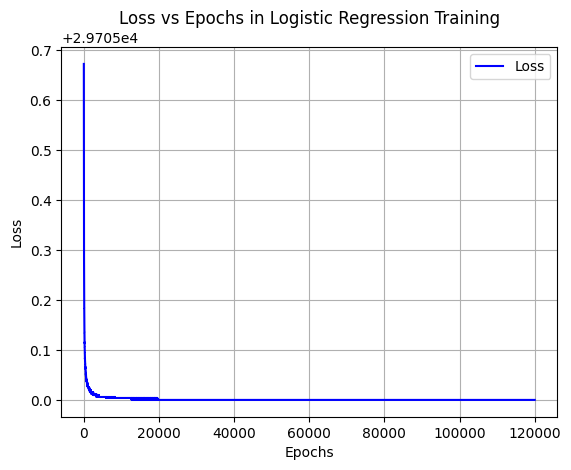

In [14]:
plt.plot(losses, label='Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs in Logistic Regression Training')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
torch.save(model, 'Model_NN_Logistic.pth')